# Plot temperature response over time

# Code + figures

## Imports:

import numpy as np
import pandas as pd

In [111]:
import xarray as xr
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

#PATH_DATASET = OUTPUT_DATA_DIR + '/forcing_data_rcmip_models.nc'
PATH_DT = OUTPUT_DATA_DIR + '/dT_data_rcmip_models.nc'

In [113]:
FIGURE_DIR = RESULTS_DIR + '/figures/'

In [114]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'

### Define variables to look at:

In [115]:
# variables to plot:
variables_erf_comp = [
    'Effective Radiative Forcing|Anthropogenic|CH4',
    'Effective Radiative Forcing|Anthropogenic|Aerosols',
    'Effective Radiative Forcing|Anthropogenic|Tropospheric Ozone',
    'Effective Radiative Forcing|Anthropogenic|F-Gases|HFC',
    'Effective Radiative Forcing|Anthropogenic|Other|BC on Snow']
# total ERFs for anthropogenic and total:
variables_erf_tot = ['Effective Radiative Forcing|Anthropogenic',
                     'Effective Radiative Forcing']
# Scenarios to plot:
scenarios_fl = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp370-lowNTCF-aerchemmip',  # 'ssp370-lowNTCF', Due to mistake here
                'ssp585', 'historical']

scenarios_fl_370 = ['ssp370', 'ssp370-lowNTCF-aerchemmip','ssp370-lowNTCF-gidden'# Due to mistake here
                ]

climatemodels_fl = ['Cicero-SCM', 'Cicero-SCM-ECS3', 'FaIR-1.5-DEFAULT', 'MAGICC7.1.0.beta-rcmip-phase-1', 'OSCARv3.0']


## Open dataset:

### Integrate:
The code below opens the file generated in [2_compute_delta_T.ipynb](2_compute_delta_T.ipynb) by integrating

\begin{align*} 
\Delta T (t) &= \int_0^t ERF(t') IRF(t-t') dt' \\
\end{align*}

where IRF is the impulse response function and ERF is the effective radiative forcing from RCMIP. 

In [116]:
ds_DT = xr.open_dataset(PATH_DT)

In [117]:
ds_DT[scenario]

<xarray.DataArray 'scenario' (scenario: 8)>
array(['historical', 'ssp119', 'ssp126', 'ssp245', 'ssp370',
       'ssp370-lowNTCF-aerchemmip', 'ssp370-lowNTCF-gidden', 'ssp585'],
      dtype=object)
Coordinates:
    model         object ...
  * scenario      (scenario) object 'historical' 'ssp119' ... 'ssp585'
    region        object ...
    unit          object ...
    unit_context  object ...

In [118]:
name_deltaT = 'Delta T'

def new_varname(var, nname):
    """
    var:str
        Old variable of format varname|bla|bla
    nname:str
        name for the resulting variable, based on var
    Returns
    -------
    new variable name with nname|bla|bla
    """
    return nname + '|' + '|'.join(var.split('|')[1:])



In [119]:
variables_dt_comp = [new_varname(var, name_deltaT) for var in variables_erf_comp]

## Compute sum of all SLCF forcers

In [120]:
from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic, get_ls_dic, get_scenario_c_dic, \
    get_scenario_ls_dic

In [121]:
import pandas as pd
import numpy as np
# ds_DT = dic_ds[0.885]
s_y = '1850'
# cdic = get_scenario_c_dic()

cdic = get_scenario_c_dic()# get_cmap_dic(ds_DT[scenario].values)
lsdic = get_scenario_ls_dic()# _scget_ls_dic(ds_DT[climatemodel].values)


def sum_name(var): return '|'.join(var.split('|')[0:2]) + '|' + 'All'


var = variables_erf_comp[0]
f_totn = sum_name(var)
dt_totn = sum_name(new_varname(var, name_deltaT))

# make xarray with variable as new dimension:
_lst_f = []
_lst_dt = []
for var in variables_erf_comp:
    _lst_f.append(ds_DT[var])
    _lst_dt.append(ds_DT[new_varname(var, name_deltaT)])
erf_all = sum_name('Effective Radiative Forcing|Anthropogenic|all')
dt_all = sum_name(new_varname('Effective Radiative Forcing|Anthropogenic|all', name_deltaT))
ds_DT[erf_all] = xr.concat(_lst_f, pd.Index(variables_erf_comp, name='variable'))
ds_DT[dt_all] = xr.concat(_lst_dt, pd.Index(variables_erf_comp, name='variable'))

# Plot $\Delta T$  +/- 1 standard deviation over the models

### Final figures:

In [122]:
import matplotlib.pyplot as plt
from ar6_ch6_rcmipfigs.utils.misc_func import make_folders


def get_fig_ax_tot(figsize=[13,12]):
    """
    Does something stupid
    :param figsize:
    :return:
    """
    fig2 = plt.figure(constrained_layout=False, figsize=figsize)
    spec2 = gridspec.GridSpec(ncols=12, nrows=4, figure=fig2)
    com_axs = []
    for i in np.arange(2):
        for j in np.arange(3):
            if i==1 and j==2: continue
            com_axs.append(fig2.add_subplot(spec2[i, j*4:(j+1)*4]))
    all_ax = fig2.add_subplot(spec2[2:, 2:10])
    return fig2, com_axs, all_ax
def fix_ax(ax):
    ls = pd.date_range('2010-1-1', periods=100, freq='Y')[0::10]
    ax.set_xticks(list(ls))
    ax.set_xlim(s_y2, e_y2)  # '2015','2100')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    return




Delta T|Anthropogenic|CH4
Delta T|Anthropogenic|Aerosols
Delta T|Anthropogenic|Tropospheric Ozone
Delta T|Anthropogenic|F-Gases|HFC
Delta T|Anthropogenic|Other|BC on Snow
Delta T|Anthropogenic|All


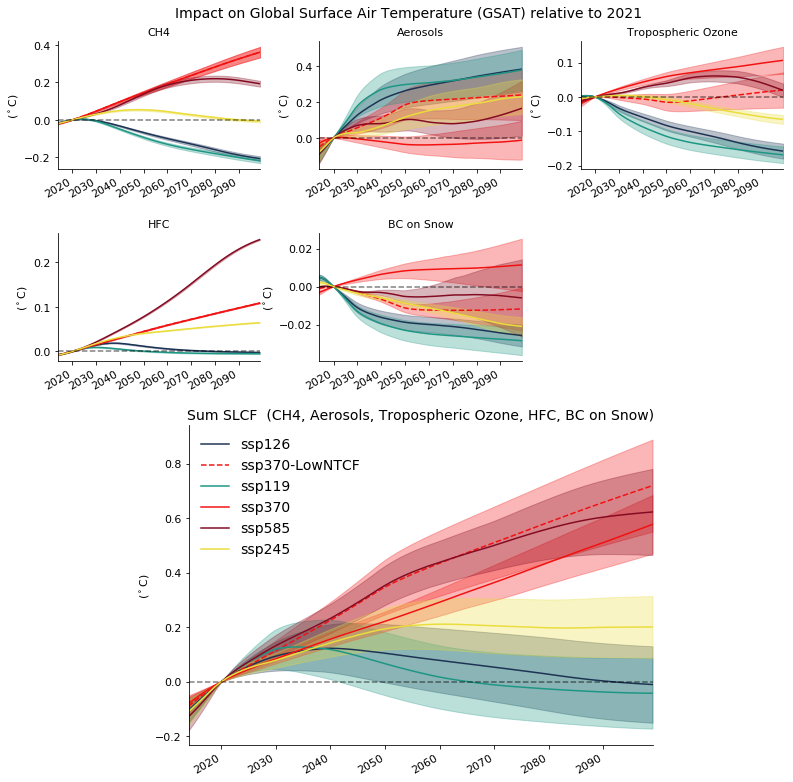

In [123]:
from ar6_ch6_rcmipfigs.utils.plot import trans_scen2plotlabel


#get_fig_ax_tot


figsize = [6, 4]
cdic = get_cmap_dic(ds_DT[scenario].values)
lsdic = get_scenario_ls_dic()#get_ls_dic(ds_DT[climatemodel].values)
s_y = '2021'
e_y = '2100'
s_y2 = '2015'
e_y2 = '2100'
cdic = get_scenario_c_dic()
SMALL_SIZE = 11
MEDIUM_SIZE = 11
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig2, axs, ax_tot = get_fig_ax_tot()

_ds = ds_DT.sel(time=slice(s_y2, e_y2))
for var, ax in zip(variables_dt_comp, axs):
    print(var)
    #fig, ax = plt.subplots(1, 1, figsize=figsize)
    for scn in list(set(scenarios_fl) - {'historical'}):
        first = True
        _da = ds_DT[var].sel(scenario=scn, time=slice(s_y2, e_y2)) - ds_DT[new_varname(var, name_deltaT)].sel(
            scenario=scn,
            time=slice(s_y,
                       s_y)).squeeze()
        # _da2 = ds_DT[var].sel(scenario=scn, time=slice(s_y2,e_y2))- ds_DT[var].sel(scenario=scn, time=slice(s_y,s_y)).squeeze()
        _pl_da = _da.mean(climatemodel)
        _pl_da.plot(ax=ax, c=cdic[scn], label=trans_scen2plotlabel(scn), linestyle = lsdic[scn])
        _std = _da.std(climatemodel)
        ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.3,
                        color=cdic[scn], label='_nolegen_')
    ax.set_title('%s' % ('|'.join(var.split('|')[1:])))
    ax.set_title('%s' % var.split('|')[-1])
    ax.set_ylabel('')#Change in temperature (C$^\circ$)')
    ax.set_xlabel('')
    fign = FIGURE_DIR + '/%s_refy%s_fy%s.png' % (var.replace(' ', '_').replace('|', '-'), s_y, s_y2)
    make_folders(fign)
    fix_ax(ax)
    ax.plot(_ds['time'], np.zeros(len(_ds['time'])), c='k', alpha=0.5, linestyle='dashed')
    
    
axs[0].set_ylabel('($^\circ$C)')
for ax in axs:
    ax.set_ylabel('($^\circ$C)')
# Total:

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax = ax_tot

cdic = get_scenario_c_dic()
# ax = axs[-1,-1]
for var in [dt_totn]:  # , f_totn]:
    print(var)
    for scn in list(set(scenarios_fl) - {'historical'}):
        # Plot dataset difference to first year, i.e.
        ds_DT_sy = ds_DT[var].sel(scenario=scn,
                       time=slice(s_y, s_y)).squeeze()
        _da = ds_DT[var].sel(scenario=scn, time=slice(s_y2, e_y2)) - ds_DT_sy
        # Take mean over climate models:
        _pl_da = _da.mean(climatemodel)
        # Sum up the variables:
        _pl_da = _pl_da.sum(variable)
        # plot :
        _pl_da.plot(ax=ax, c=cdic[scn], label=trans_scen2plotlabel(scn), xticks=[], linestyle = lsdic[scn])
        # calculate standard deviation over the models:
        _std = _da.sum(variable).std(climatemodel)
        # Fill between +/- 1 std
        ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.3,
                        color=cdic[scn], label='_nolegend_')
_ds = ds_DT.sel(time=slice(s_y2, e_y2))
ax.plot(_ds['time'], np.zeros(len(_ds['time'])), c='k', alpha=0.5, linestyle='dashed')
plt.suptitle('Impact on Global Surface Air Temperature (GSAT) relative to 2021', fontsize=14)
# adjust plot visuals:
_str = ''
for var in ds_DT[variable].values: _str += '%s, ' % var.split('|')[-1]
#ax.set_title('Temperature change, sum SLCF  (%s)' % _str[:-2])
ax.set_title('Sum SLCF  (%s)' % _str[:-2])
#ax.set_ylabel('$\Delta$ T ($^\circ$C)')
ax.set_ylabel('($^\circ$C)')
ax.set_xlabel('')

ax.legend(frameon=False, loc=2)
fix_ax(ax)
plt.subplots_adjust(top=0.94, left=0.125, wspace=9.1, hspace=.5)
#plt.tight_layout()
plt.savefig(FIGURE_DIR+ '/total_ref2021_from2015_all_2.png', dpi=300)
plt.show()

Delta T|Anthropogenic|CH4
Delta T|Anthropogenic|Aerosols
Delta T|Anthropogenic|Tropospheric Ozone
Delta T|Anthropogenic|F-Gases|HFC
Delta T|Anthropogenic|Other|BC on Snow
Delta T|Anthropogenic|All


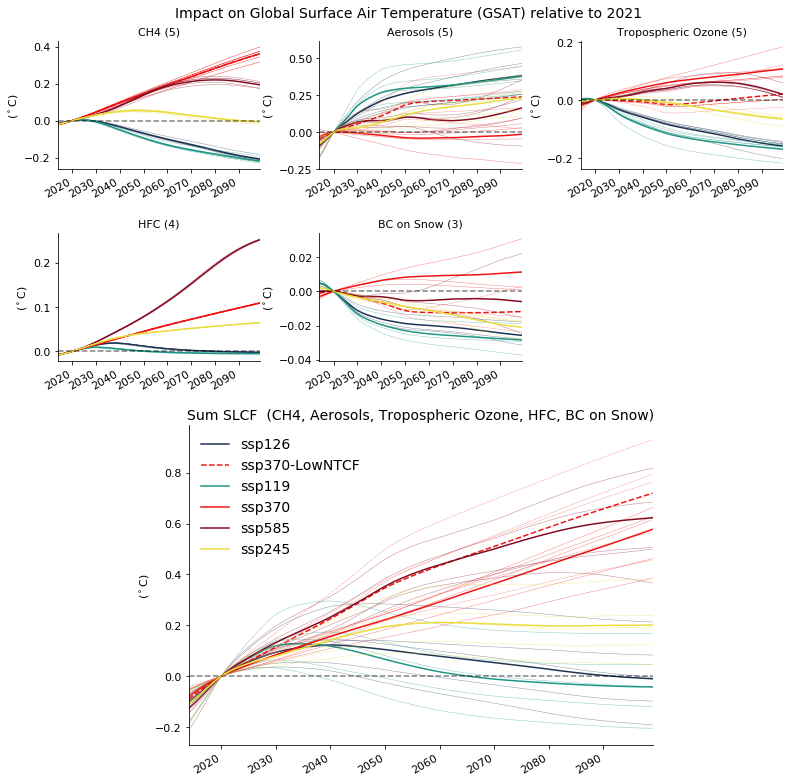

In [124]:
from ar6_ch6_rcmipfigs.utils.plot import trans_scen2plotlabel


#get_fig_ax_tot


figsize = [6, 4]
cdic = get_cmap_dic(ds_DT[scenario].values)
lsdic = get_scenario_ls_dic()#get_ls_dic(ds_DT[climatemodel].values)
s_y = '2021'
e_y = '2100'
s_y2 = '2015'
e_y2 = '2100'
cdic = get_scenario_c_dic()
SMALL_SIZE = 11
MEDIUM_SIZE = 11
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig2, axs, ax_tot = get_fig_ax_tot()

_ds = ds_DT.sel(time=slice(s_y2, e_y2))
for var, ax in zip(variables_dt_comp, axs):
    print(var)
    #fig, ax = plt.subplots(1, 1, figsize=figsize)
    for scn in list(set(scenarios_fl) - {'historical'}):
        first = True
        _da = ds_DT[var].sel(scenario=scn, time=slice(s_y2, e_y2)) - ds_DT[new_varname(var, name_deltaT)].sel(
            scenario=scn,
            time=slice(s_y,
                       s_y)).squeeze()
        # _da2 = ds_DT[var].sel(scenario=scn, time=slice(s_y2,e_y2))- ds_DT[var].sel(scenario=scn, time=slice(s_y,s_y)).squeeze()
        _pl_da = _da.mean(climatemodel)
        _pl_da.plot(ax=ax, c=cdic[scn], label=trans_scen2plotlabel(scn), linestyle = lsdic[scn])
        _std = _da.std(climatemodel)
         # PLOT EACH MODEL:
        cnt=0
        for cm in _da.coords['climatemodel']:
            if not np.all(_da.sel(climatemodel=cm).isnull()):
                cnt+=1
            _da.sel(climatemodel=cm).plot(alpha=.5,linewidth=0.5, color=cdic[scn], ax=ax, linestyle = lsdic[scn])
        #ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.3,
        #                color=cdic[scn], label='_nolegen_')
    ax.set_title('%s' % ('|'.join(var.split('|')[1:])))
    ax.set_title('%s (%d)' % (var.split('|')[-1], cnt))
    ax.set_ylabel('')#Change in temperature (C$^\circ$)')
    ax.set_xlabel('')
    fign = FIGURE_DIR + '/%s_refy%s_fy%s.png' % (var.replace(' ', '_').replace('|', '-'), s_y, s_y2)
    make_folders(fign)
    fix_ax(ax)
    ax.plot(_ds['time'], np.zeros(len(_ds['time'])), c='k', alpha=0.5, linestyle='dashed')
    
    
axs[0].set_ylabel('($^\circ$C)')
for ax in axs:
    ax.set_ylabel('($^\circ$C)')
# Total:

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax = ax_tot

cdic = get_scenario_c_dic()
# ax = axs[-1,-1]
for var in [dt_totn]:  # , f_totn]:
    print(var)
    for scn in list(set(scenarios_fl) - {'historical'}):
        # Plot dataset difference to first year, i.e.
        ds_DT_sy = ds_DT[var].sel(scenario=scn,
                       time=slice(s_y, s_y)).squeeze()
        _da = ds_DT[var].sel(scenario=scn, time=slice(s_y2, e_y2)) - ds_DT_sy
        # Take mean over climate models:
        _pl_da = _da.mean(climatemodel)
        # Sum up the variables:
        _pl_da = _pl_da.sum(variable)
        # plot :
        _pl_da.plot(ax=ax, c=cdic[scn], label=trans_scen2plotlabel(scn), xticks=[], linestyle = lsdic[scn])
        # PLOT EACH MODEL:
        for cm in _da.coords['climatemodel']:
            _da.sum(variable).sel(climatemodel=cm).plot(alpha=.5,linewidth=.5, color=cdic[scn], ax=ax, linestyle = lsdic[scn])
        _std = _da.sum(variable).std(climatemodel)
        # Fill between +/- 1 std
        #ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.3,
        #                color=cdic[scn], label='_nolegend_')
_ds = ds_DT.sel(time=slice(s_y2, e_y2))
ax.plot(_ds['time'], np.zeros(len(_ds['time'])), c='k', alpha=0.5, linestyle='dashed')
plt.suptitle('Impact on Global Surface Air Temperature (GSAT) relative to 2021', fontsize=14)
# adjust plot visuals:
_str = ''
for var in ds_DT[variable].values: _str += '%s, ' % var.split('|')[-1]
#ax.set_title('Temperature change, sum SLCF  (%s)' % _str[:-2])
ax.set_title('Sum SLCF  (%s)' % _str[:-2])
#ax.set_ylabel('$\Delta$ T ($^\circ$C)')
ax.set_ylabel('($^\circ$C)')
ax.set_xlabel('')

ax.legend(frameon=False, loc=2)
fix_ax(ax)
plt.subplots_adjust(top=0.94, left=0.125, wspace=9.1, hspace=.5)
#plt.tight_layout()
plt.savefig(FIGURE_DIR+ '/total_ref2021_from2015_all_2_v2.png', dpi=300)
plt.show()

In [125]:
ds_DT[var].sel(scenario=scenarios_fl_370[-1])#'ssp370-lowNTCF-gidden')#coords[scenario]

<xarray.DataArray 'Effective Radiative Forcing|Anthropogenic|Other|BC on Snow' (climatemodel: 5, time: 251)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [ 0.      , -0.00022 , -0.000314, ...,  0.007265,  0.007084,  0.006902],
       [ 0.      , -0.000134,  0.000831, ...,  0.027503,  0.027204,  0.026976],
       [ 0.020225,  0.0209  ,  0.021338, ...,  0.110405,  0.110972,  0.113205]])
Coordinates:
  * time          (time) datetime64[ns] 1850-01-01 1851-01-01 ... 2100-01-01
    model         object ...
    scenario      <U21 'ssp370-lowNTCF-gidden'
    region        object ...
    unit          object ...
  * climatemodel  (climatemodel) object 'Cicero-SCM' ... 'OSCARv3.0'
    unit_context  object ...

In [126]:
scenarios_fl_370

['ssp370', 'ssp370-lowNTCF-aerchemmip', 'ssp370-lowNTCF-gidden']

In [127]:
cdic = get_cmap_dic(ds_DT[scenario].values)
cdic

{'historical': (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 'ssp119': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 'ssp126': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 'ssp245': (0.8352941176470589, 0.3686274509803922, 0.0),
 'ssp370': (0.8, 0.47058823529411764, 0.7372549019607844),
 'ssp370-lowNTCF-aerchemmip': (0.792156862745098,
  0.5686274509803921,
  0.3803921568627451),
 'ssp370-lowNTCF-gidden': (0.984313725490196,
  0.6862745098039216,
  0.8941176470588236),
 'ssp585': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)}

Delta T|Anthropogenic|CH4
Delta T|Anthropogenic|Aerosols
Delta T|Anthropogenic|Tropospheric Ozone
Delta T|Anthropogenic|F-Gases|HFC
Delta T|Anthropogenic|Other|BC on Snow
Delta T|Anthropogenic|All


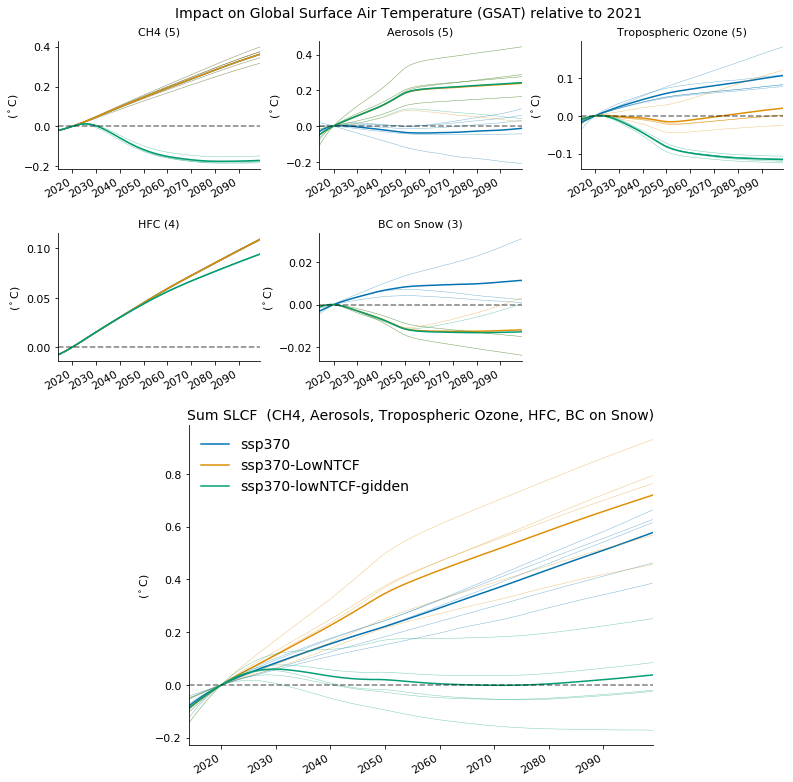

In [130]:
from ar6_ch6_rcmipfigs.utils.plot import trans_scen2plotlabel


#get_fig_ax_tot


figsize = [6, 4]
cdic = get_cmap_dic(scenarios_fl_370)
lsdic = get_scenario_ls_dic()#get_ls_dic(ds_DT[climatemodel].values)
s_y = '2021'
e_y = '2100'
s_y2 = '2015'
e_y2 = '2100'
SMALL_SIZE = 11
MEDIUM_SIZE = 11
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig2, axs, ax_tot = get_fig_ax_tot()

_ds = ds_DT.sel(time=slice(s_y2, e_y2))
for var, ax in zip(variables_dt_comp, axs):
    print(var)
    #fig, ax = plt.subplots(1, 1, figsize=figsize)
    for scn in scenarios_fl_370:#list(set(scenarios_fl) - {'historical'}):
        first = True
        _da = ds_DT[var].sel(scenario=scn, time=slice(s_y2, e_y2)) - ds_DT[new_varname(var, name_deltaT)].sel(
            scenario=scn,
            time=slice(s_y,
                       s_y)).squeeze()
        # _da2 = ds_DT[var].sel(scenario=scn, time=slice(s_y2,e_y2))- ds_DT[var].sel(scenario=scn, time=slice(s_y,s_y)).squeeze()
        _pl_da = _da.mean(climatemodel)
        _pl_da.plot(ax=ax, c=cdic[scn], label=trans_scen2plotlabel(scn))#, linestyle = lsdic[scn])
        _std = _da.std(climatemodel)
         # PLOT EACH MODEL:
        cnt=0
        for cm in _da.coords['climatemodel']:
            if not np.all(_da.sel(climatemodel=cm).isnull()):
                cnt+=1
            _da.sel(climatemodel=cm).plot(alpha=.5,linewidth=0.5, color=cdic[scn], ax=ax)#, linestyle = lsdic[scn])
        #ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.3,
        #                color=cdic[scn], label='_nolegen_')
    ax.set_title('%s' % ('|'.join(var.split('|')[1:])))
    ax.set_title('%s (%d)' % (var.split('|')[-1], cnt))
    ax.set_ylabel('')#Change in temperature (C$^\circ$)')
    ax.set_xlabel('')
    fign = FIGURE_DIR + '/%s_refy%s_fy%s.png' % (var.replace(' ', '_').replace('|', '-'), s_y, s_y2)
    make_folders(fign)
    fix_ax(ax)
    ax.plot(_ds['time'], np.zeros(len(_ds['time'])), c='k', alpha=0.5, linestyle='dashed')
    
    
axs[0].set_ylabel('($^\circ$C)')
for ax in axs:
    ax.set_ylabel('($^\circ$C)')
# Total:

SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax = ax_tot

# ax = axs[-1,-1]
for var in [dt_totn]:  # , f_totn]:
    print(var)
    for scn in  scenarios_fl_370:#list(set(scenarios_fl) - {'historical'}):
        # Plot dataset difference to first year, i.e.
        ds_DT_sy = ds_DT[var].sel(scenario=scn,
                       time=slice(s_y, s_y)).squeeze()
        _da = ds_DT[var].sel(scenario=scn, time=slice(s_y2, e_y2)) - ds_DT_sy
        # Take mean over climate models:
        _pl_da = _da.mean(climatemodel)
        # Sum up the variables:
        _pl_da = _pl_da.sum(variable)
        # plot :
        _pl_da.plot(ax=ax, label=trans_scen2plotlabel(scn), xticks=[], c=cdic[scn])#, linestyle = lsdic[scn])
        # PLOT EACH MODEL:
        for cm in _da.coords['climatemodel']:
            _da.sum(variable).sel(climatemodel=cm).plot(alpha=.5,linewidth=.5, color=cdic[scn], ax=ax)#, linestyle = lsdic[scn])
        _std = _da.sum(variable).std(climatemodel)
        # Fill between +/- 1 std
        #ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.3,
        #                color=cdic[scn], label='_nolegend_')
_ds = ds_DT.sel(time=slice(s_y2, e_y2))
ax.plot(_ds['time'], np.zeros(len(_ds['time'])), c='k', alpha=0.5, linestyle='dashed')
plt.suptitle('Impact on Global Surface Air Temperature (GSAT) relative to 2021', fontsize=14)
# adjust plot visuals:
_str = ''
for var in ds_DT[variable].values: _str += '%s, ' % var.split('|')[-1]
#ax.set_title('Temperature change, sum SLCF  (%s)' % _str[:-2])
ax.set_title('Sum SLCF  (%s)' % _str[:-2])
#ax.set_ylabel('$\Delta$ T ($^\circ$C)')
ax.set_ylabel('($^\circ$C)')
ax.set_xlabel('')

ax.legend(frameon=False, loc=2)
fix_ax(ax)
plt.subplots_adjust(top=0.94, left=0.125, wspace=9.1, hspace=.5)
#plt.tight_layout()
plt.savefig(FIGURE_DIR+ '/total_ref2021_from2015_all_2_v2.png', dpi=300)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
figsize = [7, 4.5]
s_y = '2021'
s_y2 = '2015'
e_y = '2100'
e_y2 = '2100'
# fig, axs = plt.subplots(1,2, figsize=[18,5])
cdic = get_cmap_dic(ds_DT[scenario].values)
lsdic = get_scenario_ls_dic()#get_ls_dic(ds_DT[climatemodel].values)

s_y = '2021'
e_y = '2100'
s_y2 = '2015'
e_y2 = '2100'
cdic = get_scenario_c_dic()


# fig, axs = plt.subplots(3,2, figsize=[20,20])
def fix_ax(ax):
    ls = pd.date_range('2010-1-1', periods=100, freq='Y')[0::10]
    ax.set_xticks(list(ls))
    ax.set_xlim(s_y2, e_y2)  # '2015','2100')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    return


# axs, ax_tot = get_fig_ax_tot()#fig3 = plt.figure(constrained_layout=True)
# f3_ax1.set_title('gs[0, :]')
for var in variables_dt_comp:
    print(var)

    fig, ax = plt.subplots(1, 1, figsize=figsize)
    for scn in list(set(scenarios_fl) - {'historical'}):
        first = True
        _da = ds_DT[var].sel(scenario=scn, time=slice(s_y2, e_y2)) - ds_DT[new_varname(var, name_deltaT)].sel(
            scenario=scn,
            time=slice(s_y,
                       s_y)).squeeze()
        # _da2 = ds_DT[var].sel(scenario=scn, time=slice(s_y2,e_y2))- ds_DT[var].sel(scenario=scn, time=slice(s_y,s_y)).squeeze()
        _pl_da = _da.mean(climatemodel)
        _pl_da.plot(ax=ax, c=cdic[scn], label=scn, linestyle = lsdic[scn])
        _std = _da.std(climatemodel)
        ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.3,
                        color=cdic[scn], label='_nolegen_')
    ax.set_title('%s' % ('|'.join(var.split('|')[1:])))
    # axs[1].set_title('%s'%( ('|'.join(var.split('|')[1:]))))

    # ax.legend(frameon=False)#, loc=2)
    # axs[1].legend(frameon=False)#, loc=2)

    # plt.show()
    ax.set_title('%s' % var.split('|')[-1])
    #ax.set_ylabel('$\Delta$ T ($^\circ$C)')
    #ax.set_ylabel('Change in temperature (C$^\circ$)')
    ax.set_ylabel('($^\circ$C)')
    ax.set_xlabel('')
    fign = FIGURE_DIR + '/%s_refy%s_fy%s.png' % (var.replace(' ', '_').replace('|', '-'), s_y, s_y2)
    make_folders(fign)
    fix_ax(ax)
    _ds = ds_DT.sel(time=slice(s_y2, e_y2))
    #_ds = ds_DT.sel(time=slice(s_y2, e_y2))
    ax.plot(_ds['time'], np.zeros(len(_ds['time'])), c='k', alpha=0.5, linestyle='dashed')

    plt.tight_layout()
    plt.savefig(fign, dpi=200)
    plt.show()

# Total:
# ax= ax_tot#fig3.add_subplot(gs[:, 1])
fig, ax = plt.subplots(1, 1, figsize=figsize)  # [9,5])

cdic = get_scenario_c_dic()
# ax = axs[-1,-1]
_ds = ds_DT.sel(time=slice(s_y2, e_y2))

for var in [dt_totn]:  # , f_totn]:
    print(var)
    for scn in list(set(scenarios_fl) - {'historical'}):
        # Plot dataset difference to first year, i.e.
        ds_DT_sy = ds_DT[var].sel(scenario=scn,
                       time=slice(s_y, s_y)).squeeze()
        _da = ds_DT[var].sel(scenario=scn, time=slice(s_y2, e_y2)) - ds_DT_sy
        # Take mean over climate models:
        _pl_da = _da.mean(climatemodel)
        # Sum up the variables:
        _pl_da = _pl_da.sum(variable)
        # plot :
        _pl_da.plot(ax=ax, c=cdic[scn], label=trans_scen2plotlabel(scn), xticks=[], linestyle = lsdic[scn])
        # calculate standard deviation over the models:
        _std = _da.sum(variable).std(climatemodel)
        # Fill between +/- 1 std
        ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.3,
                        color=cdic[scn], label='_nolegend_')

# adjust plot visuals:
_str = ''
for var in ds_DT[variable].values: _str += '%s, ' % var.split('|')[-1]
#ax.set_title('Sum SLCF (%s)' % _str[:-2])
ax.set_title('Temperature change, sum SLCF \n(%s)' % _str[:-2])

ax.set_ylabel('($^\circ$C)')
ax.set_xlabel('')

ax.legend(frameon=False, loc=2)
fix_ax(ax)
_ds = ds_DT.sel(time=slice(s_y2, e_y2))
ax.plot(_ds['time'], np.zeros(len(_ds['time'])), c='k', alpha=0.5, linestyle='dashed')

plt.tight_layout()
plt.savefig(FIGURE_DIR + '/total_ref2021_from2015_all_.png', dpi=200)
plt.show()

# Supplementary plots:

In [ ]:
from ar6_ch6_rcmipfigs.utils.plot import get_scenario_ls_dic, get_scenario_c_dic

lsdic = get_scenario_ls_dic()#get_ls_dic(ds_DT[climatemodel].values)
s_y = '2021'
e_y = '2100'
cdic = get_scenario_c_dic()
alpha = 0.3
for var in variables_erf_comp:
    fig, axs = plt.subplots(1, 2, figsize=[20, 6])
    for scn in scenarios_fl:#) - {'historical'}):
        first = True
        _da1 = ds_DT[new_varname(var, name_deltaT)].sel(scenario=scn)        
        _da2 = ds_DT[var].sel(scenario=scn)
        for _da, ax in zip([_da1, _da2], axs):
            _pl_da = _da.mean(climatemodel)
            _pl_da.plot(ax=ax, c=cdic[scn], label=scn, linestyle = lsdic[scn])
            _std = _da.std(climatemodel)
            ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=alpha,
                            color=cdic[scn], label='_nolegen_')
            #for cm in _da[climatemodel].values:
            #    _da.sel(climatemodel=cm).plot(ax=ax, color=cdic[scn], label='_nolabel_')
    print(var)

    axs[0].set_title(new_varname(var, name_deltaT))
    axs[1].set_title(var)
    # axs[1].set_title('%s'%( ('|'.join(var.split('|')[1:]))))

    axs[0].legend(frameon=False, loc=2)
    axs[1].legend(frameon=False, loc=2)

    plt.show()

In [ ]:
cdic

In [ ]:
plt.plot([1,2],[1,2], linestyle=(0,(1,1)))

In [ ]:
type(ls_dic['OSCARv3.0'] )

In [ ]:
type((0,(1,1)))

In [ ]:
plt.plot(_da['time'], _da.sel(climatemodel=cm),linestyle=(0,(1,1)))

In [ ]:

lsdic = get_ls_dic(ds_DT[climatemodel].values)
s_y = '2021'
e_y = '2100'
cdic = get_scenario_c_dic()
ls_dic = get_ls_dic(climatemodels_fl)
ls_dic['OSCARv3.0'] = 'solid'
for var in variables_erf_comp:
    fig, axs = plt.subplots(1, 2, figsize=[20, 6])
    for scn in scenarios_fl:#list(set(scenarios) - {'historical'}):
        first = True
        _da1 = ds_DT[new_varname(var, name_deltaT)].sel(scenario=scn)        
        _da2 = ds_DT[var].sel(scenario=scn)
        for _da, ax in zip([_da1, _da2], axs):
            _pl_da = _da.mean(climatemodel)
            _pl_da.plot(ax=ax, c=cdic[scn], label=scn)
            _std = _da.std(climatemodel)
            ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.1,
                            color=cdic[scn], label='_nolegen_')
            for cm in _da[climatemodel].values:
                if not np.all(_da.sel(climatemodel=cm).isnull()):
                    _da.sel(climatemodel=cm).plot(ax=ax,linestyle=ls_dic[cm], color=cdic[scn], alpha=.4)#, label=cm)
    print(var)

    axs[0].set_title(new_varname(var, name_deltaT))
    axs[1].set_title(var)
    # axs[1].set_title('%s'%( ('|'.join(var.split('|')[1:]))))

    axs[0].legend(frameon=False, loc=2)
    axs[1].legend(frameon=False, loc=2)

    plt.show()

## Plot $\Delta$ T and ERF with reference year +/- 1 standard deviation of the models

Subtracting year 2021, while still plotting from 2015. Thus the results represent the cooling/warming with respect to year 2021

In [ ]:

cdic = get_scenario_c_dic()# get_cmap_dic(ds_DT[scenario].values)
lsdic = get_scenario_ls_dic()# _scget_ls_dic(ds_DT[climatemodel].values)
s_y = '2021'
e_y = '2100'
s_y2 = '2015'
e_y2 = '2100'
cdic = get_scenario_c_dic()

for var in variables_erf_comp:
    fig, axs = plt.subplots(1, 2, figsize=[20, 6])
    for scn in scenarios_fl:#list(set(scenarios) - {'historical'}):
        first = True
        _da1 = ds_DT[new_varname(var, name_deltaT)].sel(scenario=scn, time=slice(s_y2, e_y2)) - ds_DT[
            new_varname(var, name_deltaT)].sel(
            scenario=scn, time=slice(s_y, s_y)).squeeze()
        _da2 = ds_DT[var].sel(scenario=scn, time=slice(s_y2, e_y2)) - ds_DT[var].sel(scenario=scn,
                                                                                     time=slice(s_y, s_y)).squeeze()
        for _da, ax in zip([_da1, _da2], axs):
            _pl_da = _da.mean(climatemodel)
            _pl_da.plot(ax=ax, c=cdic[scn], label=scn, linestyle = lsdic[scn])
            _std = _da.std(climatemodel)
            ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.3,
                            color=cdic[scn], label='_nolegen_')
    axs[0].set_title('%s' % ('|'.join(var.split('|')[1:])))
    axs[1].set_title('%s' % ('|'.join(var.split('|')[1:])))

    axs[0].legend(frameon=False)  # , loc=2)
    axs[1].legend(frameon=False)  # , loc=2)

    plt.show()

In [ ]:
from ar6_ch6_rcmipfigs.utils.plot import get_scenario_ls_dic

cdic = get_scenario_c_dic()# get_cmap_dic(ds_DT[scenario].values)
lsdic = get_scenario_ls_dic()# _scget_ls_dic(ds_DT[climatemodel].values)
s_y = '2015'
e_y = '2100'
s_y2 = '2021'
e_y2 = '2100'


fig, axs = plt.subplots(len(variables_erf_comp), 1, figsize=[7, 15])

for var, ax in zip(variables_erf_comp, axs):
    # print(var)
    for scn in scenarios_fl:#list(set(scenarios) - {'historical'}):
        # first=True
        _da = ds_DT[new_varname(var, name_deltaT)].sel(scenario=scn, time=slice(s_y, e_y)) - ds_DT[
            new_varname(var, name_deltaT)].sel(
            scenario=scn, time=slice(s_y2, s_y2)).squeeze()
        # _da2 = ds_DT[nvar(var, nname)].sel(scenario=scn, time=slice(s_y2,e_y2))- ds_DT[nvar(var, nname)].sel(scenario=scn, time=slice(s_y2,s_y2)).squeeze()
        # _da2 = ds_DT[var].sel(scenario=scn, time=slice(s_y,e_y))- ds_DT[var].sel(scenario=scn, time=slice(s_y,s_y)).squeeze()
        # for _da, ax in zip([_da1, _da2], axs):
        _pl_da = _da.mean(climatemodel)
        _pl_da.plot(ax=ax, c=cdic[scn], linestyle = lsdic[scn], label=scn)
        _std = _da.std(climatemodel)
        ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.3,
                        color=cdic[scn], label='_nolegen_')
        ax.set_title('%s, start year: %s' % (('|'.join(var.split('|')[1:])), s_y))
        # axs[1].set_title('%s, start year: %s'%( ('|'.join(var.split('|')[1:])), s_y2))
        # axs[1].set_title('%s'%( ('|'.join(var.split('|')[1:]))))

        ax.legend(frameon=False)  # , loc=2)
    # axs[1].legend(frameon=False)#, loc=2)

plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=[20, 6])
cdic = get_scenario_c_dic()# get_cmap_dic(ds_DT[scenario].values)
lsdic = get_scenario_ls_dic()# _scget_ls_dic(ds_DT[climatemodel].values)

for var, ax in zip([dt_totn, f_totn], axs):
    for scn in list(set(scenarios_fl) - {'historical'}):
        first = True
        _da = ds_DT[var].sel(scenario=scn)
        _da = ds_DT[var].sel(scenario=scn, time=slice(s_y, e_y)) - ds_DT[var].sel(scenario=scn,
                                                                                  time=slice(s_y, s_y)).squeeze()
        # _da2 = ds_DT[nvar(var, nname)].sel(scenario=scn, time=slice(s_y2,e_y2))- ds_DT[nvar(var, nname)].sel(scenario=scn, time=slice(s_y2,s_y2)).squeeze()

        _pl_da = _da.sum(variable)
        _pl_da = _pl_da.mean(climatemodel)
        _pl_da.plot(ax=ax, c=cdic[scn], label=scn, linestyle = lsdic[scn])
        _std = _da.sum(variable).std(climatemodel)
        #print(_std)
        ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.3,
                        color=cdic[scn], label='_nolegend_')
axs[0].set_title('%s' % ('|'.join(var.split('|')[1:])))
axs[1].set_title('%s' % ('|'.join(var.split('|')[1:])))

axs[0].legend(frameon=False)  # , loc=2)
axs[1].legend(frameon=False)  # , loc=2)

plt.show()

In [ ]:
cdic = get_scenario_c_dic()# get_cmap_dic(ds_DT[scenario].values)
lsdic = get_scenario_ls_dic()# _scget_ls_dic(ds_DT[climatemodel].values)

s_y = '2021'
s_y2 = '2015'
e_y = '2100'
e_y2 = '2100'
fig, axs = plt.subplots(1, 2, figsize=[18, 5])

for var, ax in zip([dt_totn, f_totn], axs):
    for scn in list(set(scenarios_fl) - {'historical'}):
        first = True
        _da = ds_DT[var].sel(scenario=scn)
        _da = ds_DT[var].sel(scenario=scn, time=slice(s_y2, e_y2)) - ds_DT[var].sel(scenario=scn,
                                                                                    time=slice(s_y, s_y)).squeeze()
        # _da2 = ds_DT[nvar(var, nname)].sel(scenario=scn, time=slice(s_y2,e_y2))- ds_DT[nvar(var, nname)].sel(scenario=scn, time=slice(s_y2,s_y2)).squeeze()
        # _pl_da = _da.sum(variable)
        _pl_da = _da.mean(climatemodel)
        _pl_da = _pl_da.sum(variable)
        _pl_da.plot(ax=ax, c=cdic[scn], label=scn, linestyle = lsdic[scn])
        _std = _da.sum(variable).std(climatemodel)
        # print(_std)
        ax.fill_between(_pl_da['time'].values, _pl_da - _std, _pl_da + _std, alpha=0.3,
                        color=cdic[scn], label='_nolegend_')
_str = ''
for var in ds_DT[variable].values: _str += '%s, ' % var.split('|')[-1]
axs[0].set_title('Sum SLCF (%s)' % _str[:-2])
axs[1].set_title('Sum SLCF (%s)' % _str[:-2])
# axs[1].set_title('%s'%( ('|'.join(var.split('|')[1:]))))
axs[0].set_ylabel('$\Delta$ T ($^\circ$C)')
axs[0].legend(frameon=False)  # , loc=2)
axs[1].legend(frameon=False)  # , loc=2)

plt.savefig(FIGURE_DIR + '/total_ref2021_from2015_.png')
plt.show()